In [ ]:
import numpy as np

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns

# Scikit-Learn for Modeling
import sklearn

# Import Elastic Net, Ridge Regression, and Lasso Regression
from sklearn.linear_model import ElasticNet, Ridge, Lasso

# Import Random Forest and Gradient Boosted Trees
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.svm import SVC

# Helper for cross-validation
from sklearn.model_selection import GridSearchCV

# Function for splitting training and test set
from sklearn.model_selection import train_test_split

#Data pre-processing

In [ ]:
import pandas as pd
df=pd.read_csv('/content/kc_house_data.csv')

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,20141209T000000,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,20150225T000000,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,20141209T000000,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,20150218T000000,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


formatting of date and add it into new columns Date and year

In [ ]:
df['Date']=pd.to_datetime(df['date'],format="%Y/%m/%d")
df['year'] = df['Date'].dt.year
df['property_age']=df['year']-df['yr_built']

In [ ]:
df['zipcode_f'] = df['zipcode'].astype('category')

In [ ]:
len(df['zipcode'].unique())

70

**one-hot encoding or dummy variable encoding**

In [ ]:
dff =df.drop(['id','date','Date','yr_built','yr_renovated','year','zipcode'],axis=1)

In [ ]:
row1,col1=dff.shape

In [ ]:
dff = pd.get_dummies(dff, columns=['zipcode_f'])

In [ ]:
dff.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,property_age,zipcode_f_98001,zipcode_f_98002,zipcode_f_98003,zipcode_f_98004,zipcode_f_98005,zipcode_f_98006,zipcode_f_98007,zipcode_f_98008,zipcode_f_98010,zipcode_f_98011,zipcode_f_98014,zipcode_f_98019,zipcode_f_98022,zipcode_f_98023,zipcode_f_98024,zipcode_f_98027,zipcode_f_98028,zipcode_f_98029,zipcode_f_98030,zipcode_f_98031,zipcode_f_98032,zipcode_f_98033,zipcode_f_98034,zipcode_f_98038,zipcode_f_98039,zipcode_f_98040,zipcode_f_98042,zipcode_f_98045,zipcode_f_98052,zipcode_f_98053,zipcode_f_98055,zipcode_f_98056,zipcode_f_98058,zipcode_f_98059,zipcode_f_98065,zipcode_f_98070,zipcode_f_98072,zipcode_f_98074,zipcode_f_98075,zipcode_f_98077,zipcode_f_98092,zipcode_f_98102,zipcode_f_98103,zipcode_f_98105,zipcode_f_98106,zipcode_f_98107,zipcode_f_98108,zipcode_f_98109,zipcode_f_98112,zipcode_f_98115,zipcode_f_98116,zipcode_f_98117,zipcode_f_98118,zipcode_f_98119,zipcode_f_98122,zipcode_f_98125,zipcode_f_98126,zipcode_f_98133,zipcode_f_98136,zipcode_f_98144,zipcode_f_98146,zipcode_f_98148,zipcode_f_98155,zipcode_f_98166,zipcode_f_98168,zipcode_f_98177,zipcode_f_98178,zipcode_f_98188,zipcode_f_98198,zipcode_f_98199
0,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,47.511,-122.257,1340,5650,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,47.721,-122.319,1690,7639,63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,47.738,-122.233,2720,8062,82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,47.521,-122.393,1360,5000,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,47.617,-122.045,1800,7503,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
dff.shape

(21613, 87)

#data Split

In [ ]:
from sklearn.model_selection import train_test_split
target=dff['price']
features=dff.drop(['price'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=123)


In [ ]:
X_test.to_csv('test.csv',index=False)
y_test.to_csv('test_value',index=False)

In [ ]:
print( len(X_train), len(X_test), len(y_train), len(y_test) )

17290 4323 17290 4323


#model Training

In [ ]:
from sklearn.pipeline import make_pipeline

In [ ]:
pipelines = {
    'lasso' : make_pipeline(Lasso(random_state=123)),
    'ridge' : make_pipeline(Ridge(random_state=123)),
    'enet' : make_pipeline(ElasticNet(random_state=123)),
    'rf' : make_pipeline(RandomForestRegressor(random_state=123)),
    'gb': make_pipeline(GradientBoostingRegressor(random_state=123))    
}

In [ ]:
for key, value in pipelines.items():
    print(key, type(value))
print('length',len(pipelines))

lasso <class 'sklearn.pipeline.Pipeline'>
ridge <class 'sklearn.pipeline.Pipeline'>
enet <class 'sklearn.pipeline.Pipeline'>
rf <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>
length 5


In [ ]:
# Lasso hyperparameters
lasso_hyperparameters = { 
    'lasso__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10] 
}

# Ridge hyperparameters
ridge_hyperparameters = { 
    'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]  
}
# Elastic Net hyperparameters
enet_hyperparameters = { 
    'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],                        
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]  
}

# Random forest hyperparameters
rf_hyperparameters = {'randomforestregressor__n_estimators': [100, 200],
                     'randomforestregressor__max_features': ['auto', 'sqrt', 0.33]}

# Boosted tree hyperparameters
gb_hyperparameters={'gradientboostingregressor__n_estimators': [100, 200],
                   'gradientboostingregressor__learning_rate': [0.05, 0.1, 0.2],
                   'gradientboostingregressor__max_depth': [1, 3, 5]}

In [ ]:
# Create hyperparameters dictionary
hyperparameters={'rf' : rf_hyperparameters,'lasso' : lasso_hyperparameters,'gb':gb_hyperparameters,
                 'ridge':ridge_hyperparameters,'enet':enet_hyperparameters}

In [ ]:
for key in ['enet', 'gb', 'ridge', 'rf', 'lasso']:
    if key in hyperparameters:
        if type(hyperparameters[key]) is dict:
            print( key, 'was found in hyperparameters, and it is a grid.' )
        else:
            print( key, 'was found in hyperparameters, but it is not a grid.' )
    else:
        print( key, 'was not found in hyperparameters')

enet was found in hyperparameters, and it is a grid.
gb was found in hyperparameters, and it is a grid.
ridge was found in hyperparameters, and it is a grid.
rf was found in hyperparameters, and it is a grid.
lasso was found in hyperparameters, and it is a grid.


#fit Model

In [ ]:
import torch 

In [ ]:
# Import necessary libraries
import torch
from sklearn.utils import parallel_backend

# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    # Fit model on X_train, y_train with CPU or GPU acceleration
    with parallel_backend('multiprocessing'):
        model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.044e+14, tolerance: 2.089e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.037e+14, tolerance: 2.092e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.960e+14, tolerance: 2.038e

lasso has been fitted.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.242e+14, tolerance: 2.302e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.73196e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.47673e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.42418e-17): result may not be accurate.
  return linalg.solve(A, Xy, ass

ridge has been fitted.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.229e+14, tolerance: 2.092e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.236e+14, tolerance: 2.089e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.208e+14, tolerance: 2.079e

enet has been fitted.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.261e+14, tolerance: 2.302e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegres

rf has been fitted.
gb has been fitted.


In [ ]:
# Check that we have 5 cross-validation objects
for key, value in fitted_models.items():
    print( key, type(value) )

lasso <class 'sklearn.model_selection._search.GridSearchCV'>
ridge <class 'sklearn.model_selection._search.GridSearchCV'>
enet <class 'sklearn.model_selection._search.GridSearchCV'>
rf <class 'sklearn.model_selection._search.GridSearchCV'>
gb <class 'sklearn.model_selection._search.GridSearchCV'>


In [ ]:
from sklearn.exceptions import NotFittedError

for name, model in fitted_models.items():
    try:
        pred = model.predict(X_test)
        print(name, 'has been fitted.')
    except NotFittedError as e:
        print(repr(e))

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


In [ ]:
for name, model in fitted_models.items():
    print( name, model.best_score_ )

lasso 0.8022285085712177
ridge 0.8022427169288342
enet 0.8022195953944236
rf 0.874149773729453
gb 0.8830329800415615


In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
# Display fitted random forest object
fitted_models['rf']

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('randomforestregressor',
                                        RandomForestRegressor(random_state=123))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_features': ['auto', 'sqrt',
                                                                 0.33],
                         'randomforestregressor__n_estimators': [100, 200]})

#Evaluation 

In [ ]:
# Predict test set using fitted random forest
pred = fitted_models['rf'].predict(X_test)

In [ ]:
# Calculate and print R^2 and MAE
print( 'R^2:', r2_score(y_test, pred ))
print( 'MAE:', mean_absolute_error(y_test, pred))


R^2: 0.8993615614446097
MAE: 67743.82245249387


In [ ]:
for name, model in fitted_models.items():
    pred = model.predict(X_test)
    print( name )
    print( '--------' )
    print( 'R^2:', r2_score(y_test, pred ))
    print( 'MAE:', mean_absolute_error(y_test, pred))
    print()

lasso
--------
R^2: 0.8183952622254607
MAE: 95903.57531705982

ridge
--------
R^2: 0.8184126377455363
MAE: 95883.19884563748

enet
--------
R^2: 0.8183639172860928
MAE: 95841.01043750273

rf
--------
R^2: 0.8993615614446097
MAE: 67743.82245249387

gb
--------
R^2: 0.9007816648999446
MAE: 69087.68772385802



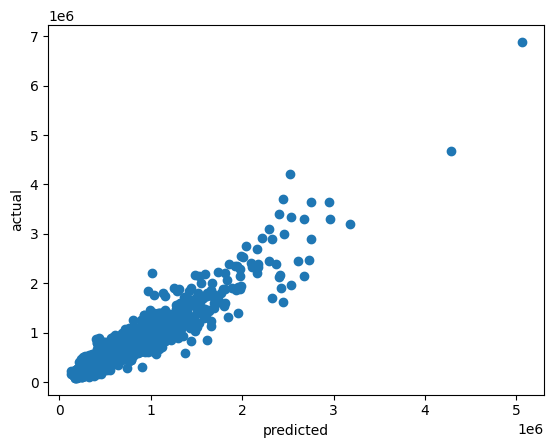

In [ ]:
gb_pred = fitted_models['rf'].predict(X_test)
plt.scatter(gb_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

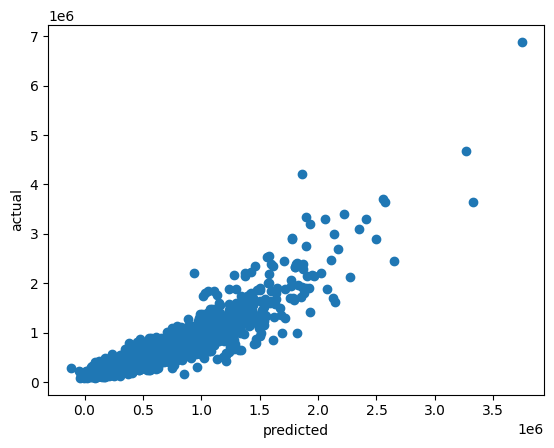

In [ ]:
gb_pred = fitted_models['lasso'].predict(X_test)
plt.scatter(gb_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

#Saving Model

In [ ]:
# Pickle for saving model files
import pickle

In [ ]:
# Save winning model as final_model.pkl
with open('model_luther.pkl', 'wb') as f:
    pickle.dump(fitted_models['enet'].best_estimator_, f)